# Charts
Version: April 10th, 2024

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---

*This notebook is intended for generating quick visualizations from the emissions data*

In [2]:
sectors = pd.read_csv('data/sectors.csv')

In [5]:
sectors['SECTOR'] = sectors['SECTOR'].replace(to_replace={
    'Food & Agriculture' : 'Food'
})
sectors = sectors.drop(columns='COMPANY SIZE')

In [6]:
sectors.head()

,COMPANY NAME,YEAR,SCOPE 1,SCOPE 2 (location-based),SCOPE 2 (market-based),SCOPE 3,TOTAL EMISSIONS,TOTAL REVENUE (miillion $),CURRENCY,CARBON INTENSITY,COUNTRY OF ORIGIN,SUBMIT TO CDP,GROWTH RATE,SECTOR,REVENUE IN USD,Adjusted CI
0,Anheuser-Busch InBev,2018,3700760.0,2383505.0,2059760,24431839.0,30516104.0,54619.0,USD,111.39,Belgium,True,NaN,Food,54619.0,111.39
1,Anheuser-Busch InBev,2019,3600710.0,2215902.0,1761444,26484447.0,32301059.0,52329.0,USD,111.15,Belgium,True,-4.19,Food,52329.0,111.15
2,Anheuser-Busch InBev,2020,3081905.0,2227758.0,1633815,23652933.0,28962596.0,46881.0,USD,113.26,Belgium,True,-10.41,Food,46881.0,113.26
3,Anheuser-Busch InBev,2021,2953896.0,2243990.0,1456823,26527444.0,31725330.0,54304.0,USD,95.72,Belgium,True,15.83,Food,54304.0,95.72
4,Anheuser-Busch InBev,2022,2843883.0,2029211.0,826257,24136111.0,29009205.0,57786.0,USD,84.33,Belgium,True,6.41,Food,57786.0,84.33


---

### Averages Charts

In [7]:
avg_BySector = sectors.pivot_table(
    index='YEAR',
    columns='SECTOR',
    values='TOTAL EMISSIONS',
    aggfunc=np.mean
).reset_index().drop(index=0)

In [8]:
for col in avg_BySector.columns[1:]:
    avg_BySector[col] = (avg_BySector[col] / 100000).round(2)

In [9]:
scope1_BySector = sectors.pivot_table(
    index='YEAR',
    columns='SECTOR',
    values='SCOPE 1',
    aggfunc=np.mean
).reset_index().drop(index=0)

for col in scope1_BySector.columns[1:]:
    scope1_BySector[col] = (scope1_BySector[col] / 100000).round(2)

scope2_BySector = sectors.pivot_table(
    index='YEAR',
    columns='SECTOR',
    values='SCOPE 2 (location-based)',
    aggfunc=np.mean
).reset_index().drop(index=0)

for col in scope2_BySector.columns[1:]:
    scope2_BySector[col] = (scope2_BySector[col] / 100000).round(2)

scope3_BySector = sectors.pivot_table(
    index='YEAR',
    columns='SECTOR',
    values='SCOPE 3',
    aggfunc=np.mean
).reset_index().drop(index=0)

for col in scope3_BySector.columns[1:]:
    scope3_BySector[col] = (scope3_BySector[col] / 100000).round(2)

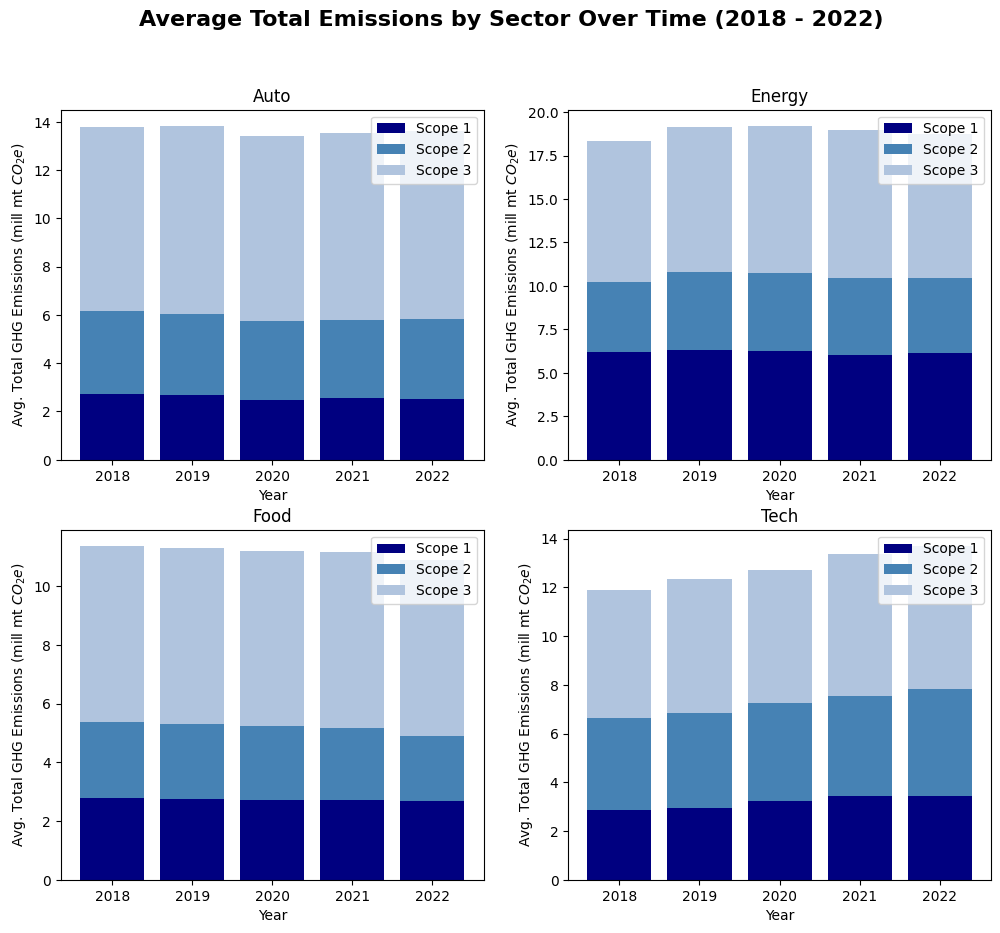

In [96]:
# natural log of emissions

n=1
plt.figure(figsize=[12,10])
for col in avg_BySector.columns[1:]:
    plt.subplot(2,2,n)
    plt.bar(scope1_BySector['YEAR'], height=np.log(scope1_BySector[col]), color='navy', label='Scope 1')
    plt.bar(scope2_BySector['YEAR'], height=np.log(scope2_BySector[col]), bottom=np.log(scope1_BySector[col]), color='steelblue', label='Scope 2')
    plt.bar(scope3_BySector['YEAR'], height=np.log(scope3_BySector[col]), bottom=np.log(scope1_BySector[col])+np.log(scope2_BySector[col]), color='lightsteelblue', label='Scope 3')


    plt.xlabel('Year')
    plt.ylabel('Avg. Total GHG Emissions (mill mt $CO_{2}e$)')
    plt.title(col)
    plt.ylim(0, )
    plt.legend()
    n+=1
plt.suptitle('Average Total Emissions by Sector Over Time (2018 - 2022)', fontsize=16, fontweight='bold')
plt.show();

In [11]:
auto = sectors[(sectors['SECTOR']=='Auto') & (sectors['YEAR']!=2017) & (sectors['COMPANY NAME']!='Hyundai')& (sectors['COMPANY NAME']!='Toyota')]

In [12]:
def ci_OverTime(sector):

    companies = sectors.loc[sectors['SECTOR']==sector, 'COMPANY NAME'].unique()
    years = ['2018','2019', '2020', '2021', '2022']

    for co in companies:
        ci = sectors[sectors['COMPANY NAME'] == co]["Adjusted CI"]
        plt.plot(years, ci, label = co, marker='o', markersize=5)
    plt.legend(loc = 'upper right', fontsize = 'xx-small')
    plt.xlabel('Year')
    plt.ylabel('Carbon Intensity (mt $CO_{2}e$ / mill USD)')
    plt.title(sector +  ' Carbon Intensity Over Time (2018-2022)');

In [26]:
auto = auto[auto['COMPANY NAME']!='BYD']

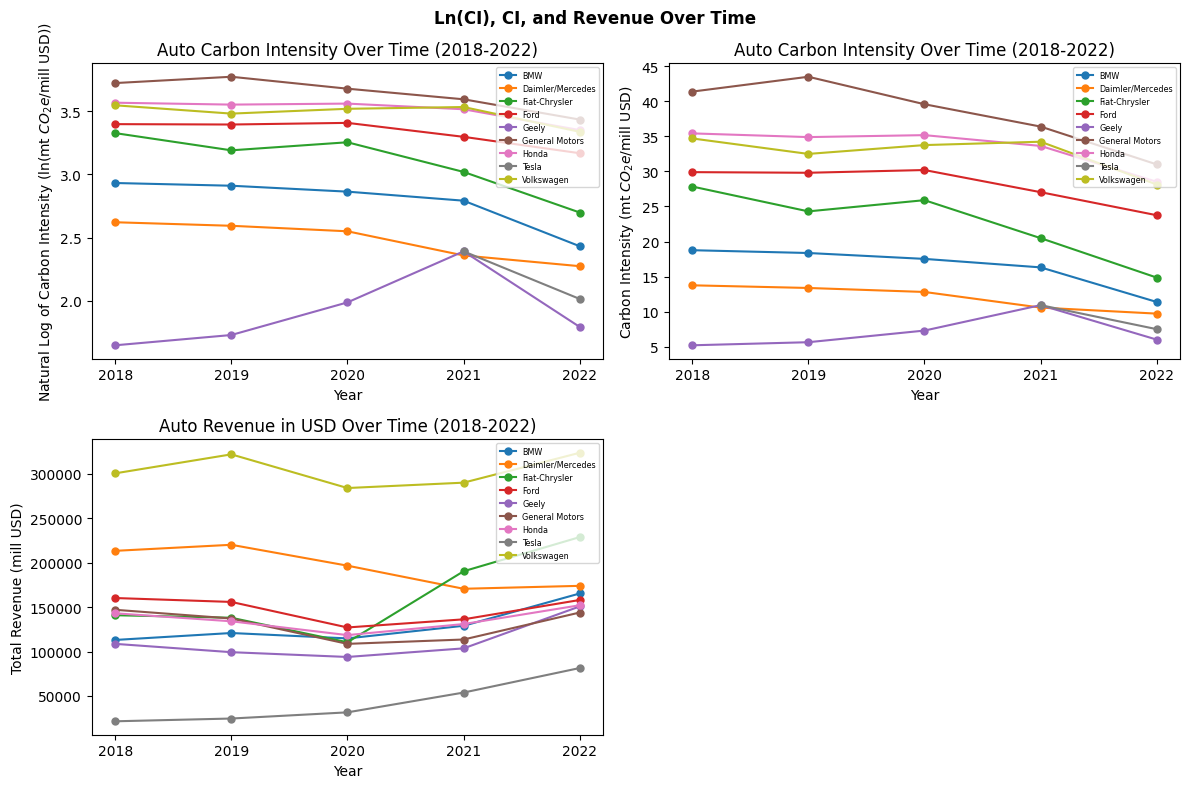

In [27]:
companies = auto.loc[:,'COMPANY NAME'].unique()
years = ['2018','2019', '2020', '2021', '2022']
plt.figure(figsize=[12,8])
plt.subplot(221)
for co in companies:
    ci = np.log(auto[auto['COMPANY NAME'] == co]["Adjusted CI"])
    plt.plot(years, ci, label = co, marker='o', markersize=5)
plt.legend(loc = 'upper right', fontsize = 'xx-small')
plt.xlabel('Year')
plt.ylabel('Natural Log of Carbon Intensity (ln(mt $CO_{2}e$/mill USD))')
plt.title('Auto' +  ' Carbon Intensity Over Time (2018-2022)');

plt.subplot(222)

for co in companies:
    ci = auto[auto['COMPANY NAME'] == co]["Adjusted CI"]
    plt.plot(years, ci, label = co, marker='o', markersize=5)
plt.legend(loc = 'upper right', fontsize = 'xx-small')
plt.xlabel('Year')
plt.ylabel('Carbon Intensity (mt $CO_{2}e$/mill USD)')
plt.title('Auto' +  ' Carbon Intensity Over Time (2018-2022)')
plt.tight_layout();

plt.subplot(223)
for co in companies:
    rev = auto[auto['COMPANY NAME'] == co]["REVENUE IN USD"]
    plt.plot(years, rev, label = co, marker='o', markersize=5)
plt.legend(loc = 'upper right', fontsize = 'xx-small')
plt.xlabel('Year')
plt.ylabel('Total Revenue (mill USD)')
plt.title('Auto' +  ' Revenue in USD Over Time (2018-2022)')

plt.suptitle('Ln(CI), CI, and Revenue Over Time', fontweight='bold')
plt.tight_layout()
plt.show()


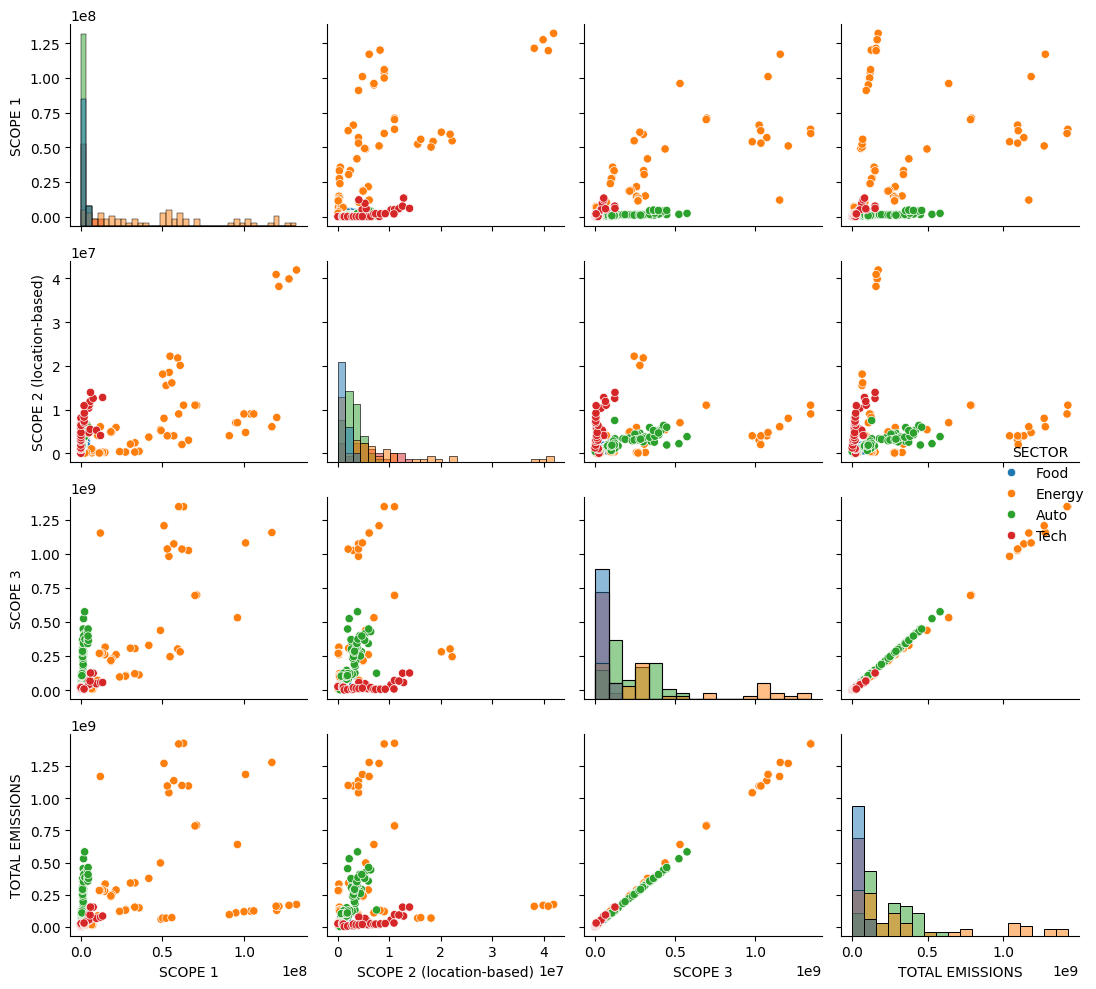

In [33]:
emissions = sectors[['SECTOR','SCOPE 1', 'SCOPE 2 (location-based)', 'SCOPE 3', 'TOTAL EMISSIONS']]
sns.pairplot(emissions, hue='SECTOR', diag_kind='hist')
plt.tight_layout()

In [68]:
medci_BySector = sectors.pivot_table(
    index='YEAR',
    columns='SECTOR',
    values='Adjusted CI',
    aggfunc = np.median
).round(0).reset_index().drop([0])
medci_BySector

SECTOR,YEAR,Auto,Energy,Food,Tech
1,2018,32.0,400.0,64.0,32.0
2,2019,31.0,434.0,63.0,32.0
3,2020,30.0,601.0,68.0,32.0
4,2021,25.0,307.0,63.0,29.0
5,2022,19.0,197.0,45.0,34.0


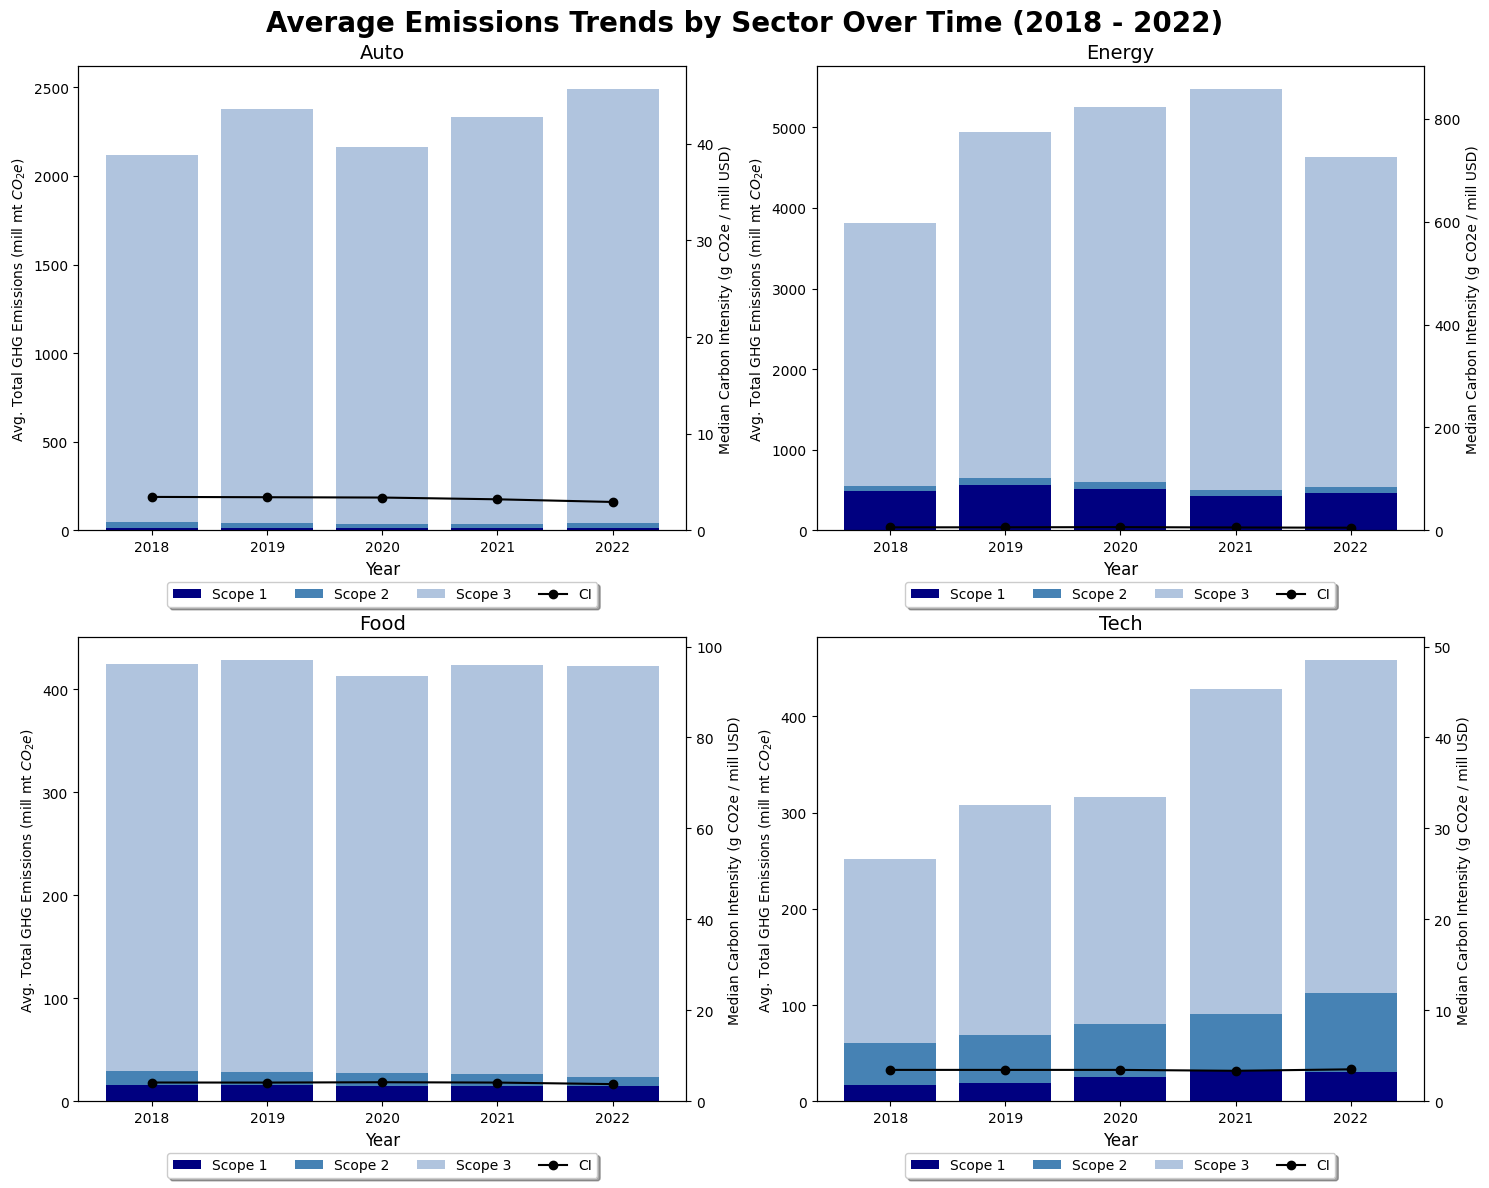

In [94]:
n=0
row = [0, 0, 1, 1]
colu = [0, 1, 0, 1]
fig, ax1 = plt.subplots(2, 2, figsize=[15,12])
for col in avg_BySector.columns[1:]:
    ax1[row[n],colu[n]].bar(scope1_BySector['YEAR'], height=scope1_BySector[col], color='navy', label='Scope 1')
    ax1[row[n],colu[n]].bar(scope2_BySector['YEAR'], height=scope2_BySector[col], bottom=scope1_BySector[col], color='steelblue', label='Scope 2')
    ax1[row[n],colu[n]].bar(scope3_BySector['YEAR'], height=scope3_BySector[col], bottom=scope1_BySector[col]+scope2_BySector[col], color='lightsteelblue', label='Scope 3')

    ax2 = ax1[row[n],colu[n]].twinx()
    ax2.plot(medci_BySector['YEAR'], np.log(medci_BySector[col]), color = 'black', marker = 'o', label='CI')
    


    ax1[row[n],colu[n]].set_xlabel('Year', fontsize=12)
    ax1[row[n],colu[n]].set_ylabel('Avg. Total GHG Emissions (mill mt $CO_{2}e$)')
    ax2.set_ylabel('Median Carbon Intensity (g CO2e / mill USD)')
    ax2.set_ylim(0, max(medci_BySector[col])*1.5)
    plt.title(col, fontsize=14)
    plt.ylim(0, )
    lines, labels = ax1[row[n],colu[n]].get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='lower center', bbox_to_anchor=(0.5, -0.18), fancybox=True, shadow=True, ncol=4)
    # plt.legend()
    n+=1

plt.suptitle('Average Emissions Trends by Sector Over Time (2018 - 2022)', fontsize=20, fontweight='bold')
plt.tight_layout()


---

### Scatterplot
Shows the scale of scope 3 in comparison to scope 1 and scope 2 (location-based)

In [ ]:
# scatterplot comparing scope 1 + scope 2 vs. scope 3
x = (sectors['SCOPE 1'] + sectors['SCOPE 2 (location-based)']) / 1000000
y = sectors['SCOPE 3']  / 1000000
sns.scatterplot(x=x, y=y, data=sectors, hue='SECTOR', s=20)
plt.xlabel('Scope 1 + Scope 2 Emissions (mill mt $CO_{2}e$)')
plt.ylabel('Scope 3 Emissions (mill mt $CO_{2}e$)')
plt.title('Scope 1 & 2 vs. Scope 3 by Sector')
plt.show();

---

### Scope 3 Plots

In [38]:
# bar chart for each year showing percentage reporting scope 3
# 1 if they reported 0 if nan

reported = []
for i in sectors['SCOPE 3'].values:
    if np.isnan(i):
        reported.append(0)
    else:
        reported.append(1)


sectors['SCOPE 3 Reported'] = reported

Text(0.5, 1.0, 'Percent Reporting Scope 3 Over Time')

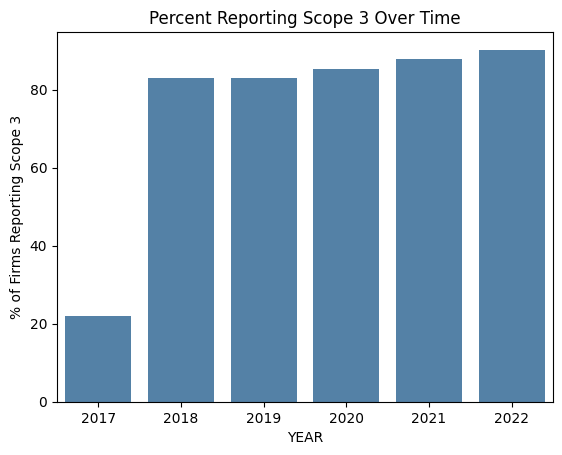

In [63]:
scope3 = sectors.groupby('YEAR')[['SCOPE 3 Reported']].sum().reset_index()
scope3['SCOPE 3 Reported'] = (scope3['SCOPE 3 Reported'] / 41) * 100
scope3['SCOPE 3 Reported'] = scope3['SCOPE 3 Reported'].round(2)
scope3
sns.barplot(scope3, x='YEAR', y='SCOPE 3 Reported', color='steelblue')
plt.ylabel('% of Firms Reporting Scope 3')
plt.title('Percent Reporting Scope 3 Over Time')

In [40]:
# companies that don't report scope 3, energy and auto

sectors[sectors['SCOPE 3'].isna()]

,COMPANY NAME,YEAR,SCOPE 1,SCOPE 2 (location-based),SCOPE 2 (market-based),SCOPE 3,TOTAL EMISSIONS,TOTAL REVENUE (miillion $),CURRENCY,CARBON INTENSITY,COUNTRY OF ORIGIN,SUBMIT TO CDP,GROWTH RATE,SECTOR,REVENUE IN USD,Adjusted CI,SCOPE 3 Reported
46,BP,2019,49200000.0,5200000.0,5200000,NaN,59600000.0,282616.0,USD,192.49,United Kingdom,False,-6.95,Energy,282616.000,192.49,0
70,Exxon,2018,104000000.0,9000000.0,9000000,NaN,122000000.0,290212.0,USD,389.37,United States,False,NaN,Energy,290212.000,389.37,0
71,Exxon,2019,106000000.0,9000000.0,9000000,NaN,124000000.0,264938.0,USD,434.06,United States,False,-8.71,Energy,264938.000,434.06,0
72,Exxon,2020,100000000.0,9000000.0,9000000,NaN,118000000.0,181502.0,USD,600.54,United States,False,-31.49,Energy,181502.000,600.54,0
73,Exxon,2021,95000000.0,7000000.0,7000000,NaN,109000000.0,285640.0,USD,357.09,United States,False,57.38,Energy,285640.000,357.09,0
75,Gazprom,2018,120089856.0,8198070.0,NaN,NaN,128287926.0,4303671.0,RUB,NaN,Russsia,True,NaN,Energy,60251.394,2129.21,0
79,Gazprom,2022,91000000.0,4020000.0,NaN,NaN,95020000.0,NaN,RUB,NaN,Russsia,False,NaN,Energy,NaN,NaN,0
90,PetroChina,2018,NaN,NaN,NaN,NaN,NaN,NaN,RMB,NaN,China,True,NaN,Energy,NaN,NaN,0
91,PetroChina,2019,132170000.0,41910000.0,NaN,NaN,174080000.0,17380.0,RMB,10016.11,China,True,NaN,Energy,126700.200,1373.95,0
92,PetroChina,2020,127570000.0,39870000.0,NaN,NaN,167440000.0,11032.0,RMB,15177.66,China,False,-36.52,Energy,80423.280,2081.98,0


---

Which Scope is changing the most over time?

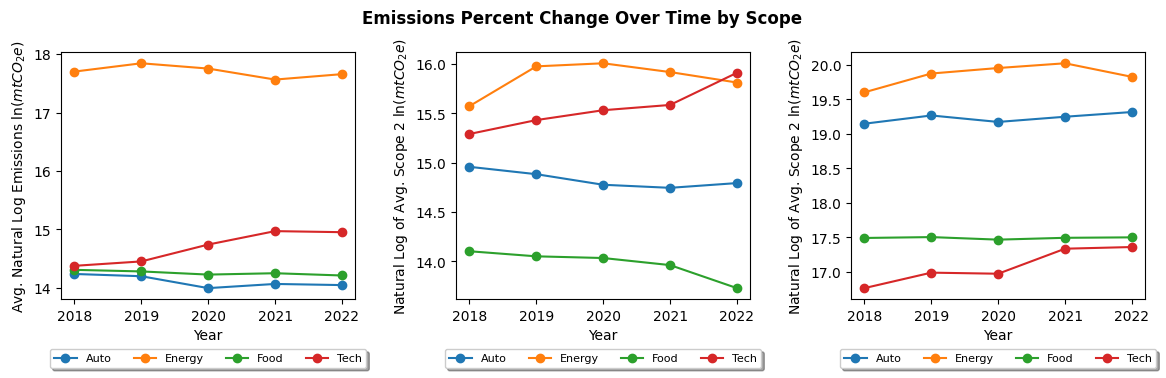

In [92]:
plt.figure(figsize=[12,4])
plt.subplot(131)
avgs1_BySector = sectors.pivot_table(
    index='YEAR',
    columns='SECTOR',
    values='SCOPE 1',
    aggfunc = np.mean
).round(2).reset_index().drop([0])

for sector in avgs1_BySector.columns[1:]:
    plt.plot(avgs1_BySector['YEAR'], np.log(avgs1_BySector[sector]), label=sector, marker='o')
    plt.ylabel('Avg. Natural Log Emissions $\ln(mt CO_{2}e)$')
    plt.xlabel('Year')
    plt.legend(fontsize=8, loc='lower center', bbox_to_anchor=(0.5, -0.3), fancybox=True, shadow=True, ncol=4)

plt.subplot(132)
avgs2_BySector = sectors.pivot_table(
    index='YEAR',
    columns='SECTOR',
    values='SCOPE 2 (location-based)',
    aggfunc = np.mean
).round(2).reset_index().drop([0])

for sector in avgs2_BySector.columns[1:]:
    plt.plot(avgs2_BySector['YEAR'], np.log(avgs2_BySector[sector]), label=sector, marker='o')
    plt.ylabel('Natural Log of Avg. Scope 2 $\ln(mt CO_{2}e)$')
    plt.xlabel('Year')
    plt.legend(fontsize=8, loc='lower center', bbox_to_anchor=(0.5, -0.3), fancybox=True, shadow=True, ncol=4)

plt.subplot(133)
avgs3_BySector = sectors.pivot_table(
    index='YEAR',
    columns='SECTOR',
    values='SCOPE 3',
    aggfunc = np.mean
).round(2).reset_index().drop([0])

for sector in avgs3_BySector.columns[1:]:
    plt.plot(avgs3_BySector['YEAR'], np.log(avgs3_BySector[sector]), label=sector, marker='o')
    plt.ylabel('Natural Log of Avg. Scope 2 $\ln(mt CO_{2}e)$')
    plt.xlabel('Year')
    plt.legend(fontsize=8, loc='lower center', bbox_to_anchor=(0.5, -0.3), fancybox=True, shadow=True, ncol=4)

plt.suptitle('Emissions Percent Change Over Time by Scope', fontweight='bold')
plt.tight_layout()
plt.show(); 
